<a href="https://colab.research.google.com/github/leopapuma/Extra-/blob/main/laberinto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

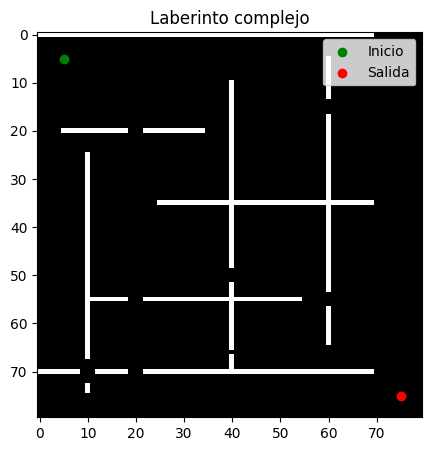

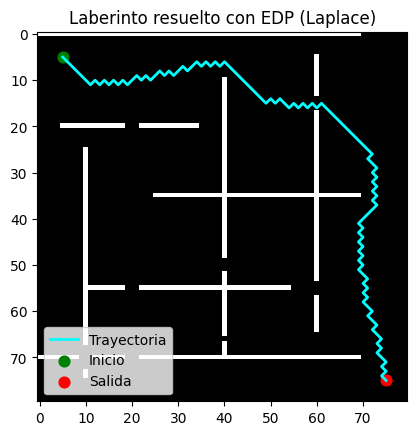

In [ ]:
#usaremos las sig librerias para resolver el laberinto
import numpy as np
import matplotlib.pyplot as plt

n = 80 # tamaño del plano que sera 80*80
maze = np.ones((n, n))  # convencion 1 es espacio libre y 0 es muro, estos se pondra en la construcion de muros veticales horizontales con el numero 0
# y 1 para las aberturas de los pasillo(puertas )

# Muros verticales que se van estar empleando en el laberinto

maze[25:75, 10] = 0  # [fila,columna] en la fila va de 25 a 74 y la columna es 10
maze[5:70, 20] = 0  #  en la fila va de 5:69, y la columna es 20
maze[10:70, 40] = 0 # en la fila va de 10:69 en la columna es 40
maze[5:65, 60] = 0 # en la fila es de 5:64, y la columna va 60


# Muros horizontales
maze[0, 0:70] = 0    #  en la fila es 0 , y la columna es 0:69
maze[20, 5:35] = 0    #  en la fila es 20, y la columna es de 5 a 34
maze[35, 25:70] = 0  #  en la fila es 35, y la columna es de 25 a 69
maze[55, 10:55] = 0  #  en la fila es 55 y la columna es 10 a 54
maze[70, 0:70] = 0  #  en la fila es 70, y la columna es 0 a 69


# puertas, aqui solo vamos abrir puertas en los murros

maze[68:73, 9:12] = 1  #  se va crear una puerta de 5*3 celdas
maze[4:72,19:22]=1  #  se va crear una pueta de 68*3 celdas
maze[29:32, 19:22] = 1  #   se va crear una puerta de 3*3 celdas
maze[49:52, 39:52] = 1  #   se va crear una puerta 3*3 celdas
maze[14:17, 59:62] = 1  #   se va crear una puerta 3*3 celdas
maze[66:67, 39:42] = 1  #   se va crear una puerta 1*3 celdas
maze[34:37, 19:22] = 1  #   se va crear una puerta 3*3 celdas
maze[54:57, 59:62] = 1  #   se va crear una puerta 3*3 celdas

start = (5, 5) # en donde vas comenzar
goal = (75, 75) # en donde debe terminar
# construimos la grafica para visualizar el laberinto usuando el codigo que se va escribir abajo
plt.figure(figsize=(5,5))
plt.imshow(maze, cmap="gray_r")
plt.scatter(start[1], start[0], c='green', label="Inicio")
plt.scatter(goal[1], goal[0], c='red', label="Salida")
plt.legend()
plt.title("Laberinto complejo")
plt.show()
u = np.ones((n, n))
u[goal] = 0
 # aqui resolveremos laplace  realizaremos muchas iteraciones para que sea estable
for _ in range(10000):
    for i in range(1, n-1):
        for j in range(1, n-1):
            if maze[i, j] == 1 and (i, j) != goal: # aqui se usara para que ivite los bordes
                u[i, j] = 0.25 * (
                    u[i+1, j] + u[i-1, j] +
                    u[i, j+1] + u[i, j-1]
                )
path = [start]
x, y = start

for _ in range(3000):

    # usaremos el gradiente para que  encotre el camino mas corto
    gx = u[x+1, y] - u[x-1, y] # direccion vertical
    gy = u[x, y+1] - u[x, y-1] #direcion horizontal

    dx = -int(np.sign(gx))
    dy = -int(np.sign(gy))

    nx, ny = x + dx, y + dy

    #  solo avanza si es pasillo escribiremos lo sig
    if maze[nx, ny] == 1:
        x, y = nx, ny
        path.append((x, y))
    else:
        break  # atrapado o mal gradiente

    if (x, y) == goal: # ponemos fin cuando llegue a la meta
        break


plt.imshow(maze, cmap="gray_r")

#  trazamos la trayectoria
px, py = zip(*path)
plt.plot(py, px, color='cyan', linewidth=2, label="Trayectoria")

# dibujos el inicio y la final en el laberinto
plt.scatter(start[1], start[0], c='green', s=60, label="Inicio")
plt.scatter(goal[1], goal[0], c='red', s=60, label="Salida")

plt.title("Laberinto resuelto con EDP (Laplace)")
plt.legend()
plt.show()


